# Experimental Protocol

## Introduction
Subjects performed different motor/imagery tasks while 64-channel EEG were recorded using the BCI2000 system ([BCI2000 website](http://www.bci2000.org)). 

## Experimental Runs
Each subject performed 14 experimental runs:
1. Two one-minute baseline runs:
   - Baseline with eyes open
   - Baseline with eyes closed
2. Three two-minute runs of each of the following tasks:
   1. Task 1: Open and close left or right fist
   2. Task 2: Imagine opening and closing left or right fist
   3. Task 3: Open and close both fists or both feet
   4. Task 4: Imagine opening and closing both fists or both feet

## Summary of Experimental Runs
1. Baseline, eyes open
2. Baseline, eyes closed
3. Task 1 (open and close left or right fist)
4. Task 2 (imagine opening and closing left or right fist)
5. Task 3 (open and close both fists or both feet)
6. Task 4 (imagine opening and closing both fists or both feet)
7. Task 1
8. Task 2
9. Task 3
10. Task 4
11. Task 1
12. Task 2
13. Task 3
14. Task 4

## Data Format
The data are provided in EDF+ format, containing:
- 64 EEG signals
- Sampled at 160 samples per second
- Annotation channel

## Annotations
Each annotation includes one of three codes (`T0`, `T1`, or `T2`):
- `T0`: Rest
- `T1`: Onset of motion (real or imagined) of
  - Left fist
  - Both fists
- `T2`: Onset of motion (real or imagined) of
  - Right fist
  - Both feet


# Getting all the paths

In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, events_from_annotations, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf
import librosa.display




In [2]:
data_path=[]
event_data_path=[]
for i in range(1,15):
    if i<10:
      data_path.append('files/S001/S001R0'+str(i)+'.edf')
      event_data_path.append('files/S001/S001R0'+str(i)+'.edf.event')
    else:
      data_path.append('files/S001/S001R'+str(i)+'.edf')
      event_data_path.append('files/S001/S001R'+str(i)+'.edf.event')

# Importing all the paths

In [3]:
raw=[]
for i in range(0,14):
  raw.append(mne.io.read_raw_edf(data_path[i], preload=True))

Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ex

# Correcting the channel mapping of all the raw data

In [4]:
channel_mapping = {'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6', 'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6', 'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6', 'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2', 'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8', 'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8', 'Ft7.': 'FT7', 'Ft8.': 'FT8', 'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10', 'Tp7.': 'TP7', 'Tp8.': 'TP8', 'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8', 'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8', 'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 'Iz..': 'Iz'}
for i in range(0,14):
	raw[i].rename_channels(channel_mapping)
	raw[i].set_montage('standard_1005')

In [5]:
raw[0].compute_psd()

Effective window size : 12.800 (s)


Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,64
Number of frequency bins,1025
Frequency range,0.00 – 80.00 Hz


In [6]:
raw[0].info['ch_names']

['FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'Fp1',
 'Fpz',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'AF4',
 'AF8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FT8',
 'T7',
 'T8',
 'T9',
 'T10',
 'TP7',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [7]:
raw_temp = raw[2]
annotations_temp = raw_temp.annotations
print(annotations_temp)
codes_temp = annotations_temp.description
print("Names of 64 Channels")
print(raw_temp.ch_names)
print("Acitivity/Target associated with samples")
print(codes_temp)
annotations=[]
codes=[]
for i in range(0,14):
  annotations.append(raw[i].annotations)
  codes.append(annotations[i].description)


<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>
Names of 64 Channels
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Acitivity/Target associated with samples
['T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1'
 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2' 'T0' 'T1' 'T0' 'T1' 'T0' 'T2'
 'T0' 'T1']


# Creating Dataframe

In [8]:
df = pd.DataFrame(raw[2].get_data().T, columns=raw[2].ch_names)
df = df[~(df == 0).all(axis=1)]
timeArray = np.array([round(x,3) for x in np.arange(0,len(df)/160,.00625)])
print(timeArray)
df

[0.00000e+00 6.00000e-03 1.20000e-02 ... 1.24481e+02 1.24488e+02
 1.24494e+02]


,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Iz
0,-0.000057,-0.000013,-0.000015,-0.000012,-0.000013,-0.000008,-0.000040,-0.000054,-0.000012,-0.000014,...,-0.000048,-0.000038,-0.000042,-0.000068,-0.000076,-0.000103,-0.000051,-0.000056,-0.000124,-0.000028
1,-0.000049,-0.000011,-0.000010,-0.000012,-0.000019,-0.000024,-0.000058,-0.000051,-0.000019,-0.000023,...,-0.000055,-0.000055,-0.000063,-0.000082,-0.000087,-0.000099,-0.000059,-0.000070,-0.000149,-0.000040
2,-0.000055,-0.000017,-0.000016,-0.000019,-0.000024,-0.000029,-0.000066,-0.000061,-0.000030,-0.000036,...,-0.000054,-0.000063,-0.000072,-0.000091,-0.000092,-0.000091,-0.000067,-0.000077,-0.000153,-0.000037
3,-0.000073,-0.000042,-0.000040,-0.000037,-0.000037,-0.000040,-0.000071,-0.000078,-0.000053,-0.000053,...,-0.000065,-0.000052,-0.000066,-0.000100,-0.000105,-0.000105,-0.000067,-0.000072,-0.000148,-0.000026
4,-0.000087,-0.000053,-0.000052,-0.000051,-0.000045,-0.000043,-0.000071,-0.000087,-0.000065,-0.000064,...,-0.000075,-0.000082,-0.000090,-0.000117,-0.000119,-0.000118,-0.000075,-0.000082,-0.000161,-0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19915,0.000023,0.000016,0.000014,0.000010,0.000010,0.000002,0.000017,0.000023,0.000024,0.000024,...,0.000013,0.000058,0.000053,0.000056,0.000042,0.000046,0.000076,0.000068,0.000086,0.000032
19916,0.000023,0.000023,0.000024,0.000020,0.000023,0.000014,0.000022,0.000031,0.000031,0.000038,...,0.000050,0.000061,0.000052,0.000072,0.000072,0.000079,0.000072,0.000082,0.000124,0.000051
19917,0.000023,0.000014,0.000011,0.000003,0.000005,-0.000003,0.000001,0.000021,0.000019,0.000025,...,0.000044,0.000024,0.000024,0.000066,0.000074,0.000085,0.000062,0.000097,0.000156,0.000075
19918,0.000038,0.000027,0.000028,0.000019,0.000019,0.000012,0.000009,0.000034,0.000032,0.000040,...,0.000025,0.000005,0.000011,0.000053,0.000051,0.000043,0.000044,0.000081,0.000140,0.000066


# PCA analysis

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(df, n_components=4):
    # Standardize the features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Perform PCA
    pca_result = pca.fit_transform(scaled_data)
    
    # Create a DataFrame to hold the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
    
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    return pca_df, explained_variance_ratio

# Perform PCA
pca_df, explained_variance_ratio = perform_pca(df,n_components=8)

# Print PCA DataFrame
print("PCA DataFrame:")
print(pca_df)

# Print explained variance ratio
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


PCA DataFrame:
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -4.725355  0.831617  1.992440  2.177419  0.061233  0.344743  1.502092   
1     -6.064683  1.895146  2.469918  2.055755 -0.099281 -0.054622  0.211421   
2     -7.585848  2.092894  2.143338  1.690139  0.246862 -0.063876 -0.612072   
3     -8.661872  1.752941  2.477909  1.155380 -0.331502  0.507326  0.060327   
4     -9.854295  2.720545  2.832536  1.118381  0.074509  0.336781 -0.384182   
...         ...       ...       ...       ...       ...       ...       ...   
19915  3.873919 -1.812209 -0.126683 -1.482056 -0.076364  1.364102 -0.473045   
19916  5.809691 -3.151095 -0.476299 -1.648559  0.254952 -0.073540  0.108849   
19917  4.426765 -3.499876 -0.779748 -1.944239 -0.119371 -1.127961 -1.033017   
19918  5.511496 -1.594895 -0.807413 -0.895396  0.116565 -1.026948 -0.398314   
19919  3.195238 -0.154394 -0.234947  0.662161  0.367568 -0.950442 -0.045498   

            PC8  
0      0.249682  


# ICA implementation

In [10]:
from mne.preprocessing import ICA

n_components = 10  # number of components to decompose
method = 'fastica'  # ICA method

ica = ICA(n_components=n_components, method=method)

ica.fit(raw[5])

Fitting ICA to data using 64 channels (please be patient, this may take a while)


Selecting by number: 10 components


C:\Users\HP\AppData\Local\Temp\ipykernel_10932\204074125.py:8: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw[5])


Fitting ICA took 0.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,28 iterations on raw data (20000 samples)
ICA components,10
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


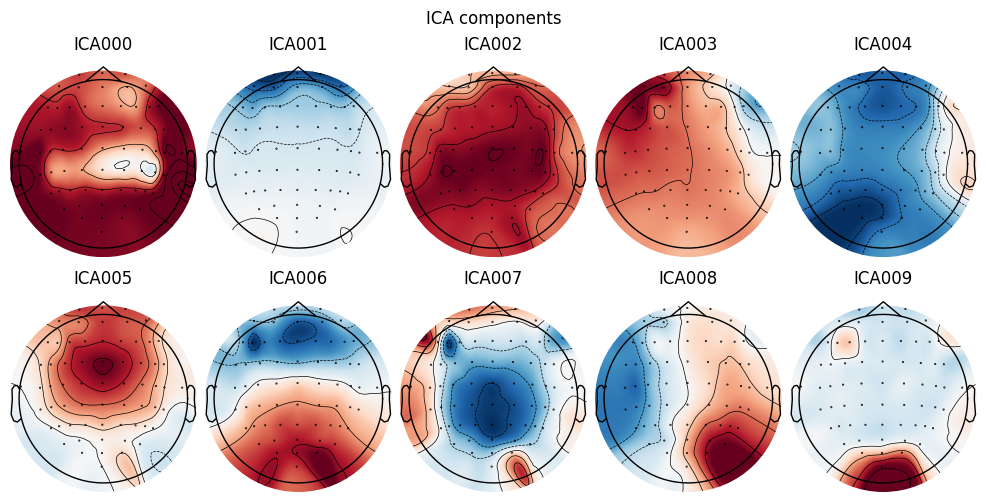

Creating RawArray with float64 data, n_channels=10, n_times=20000
    Range : 0 ... 19999 =      0.000 ...   124.994 secs
Ready.
Using matplotlib as 2D backend.


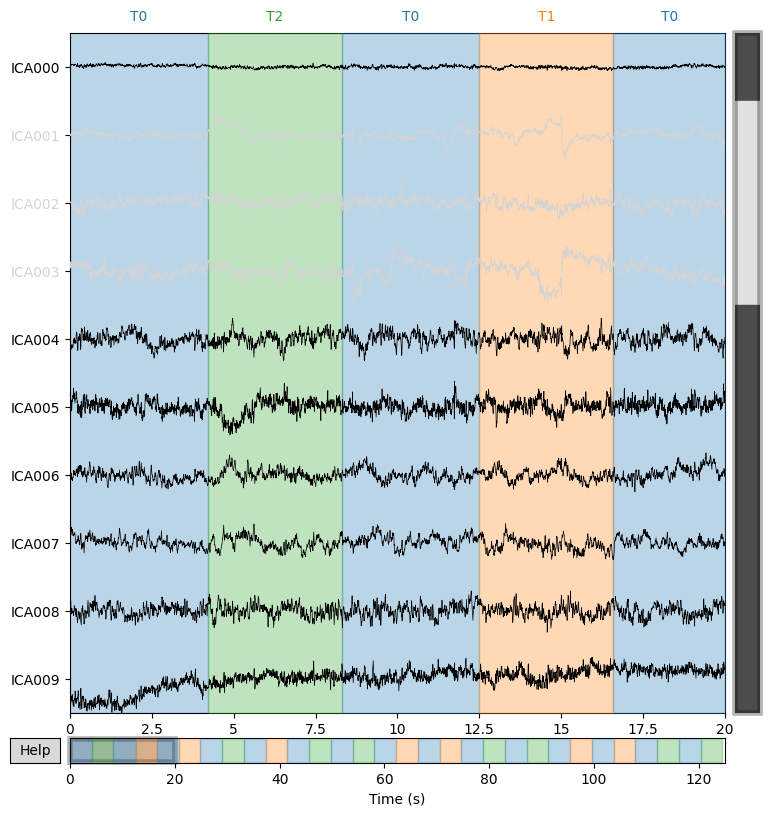

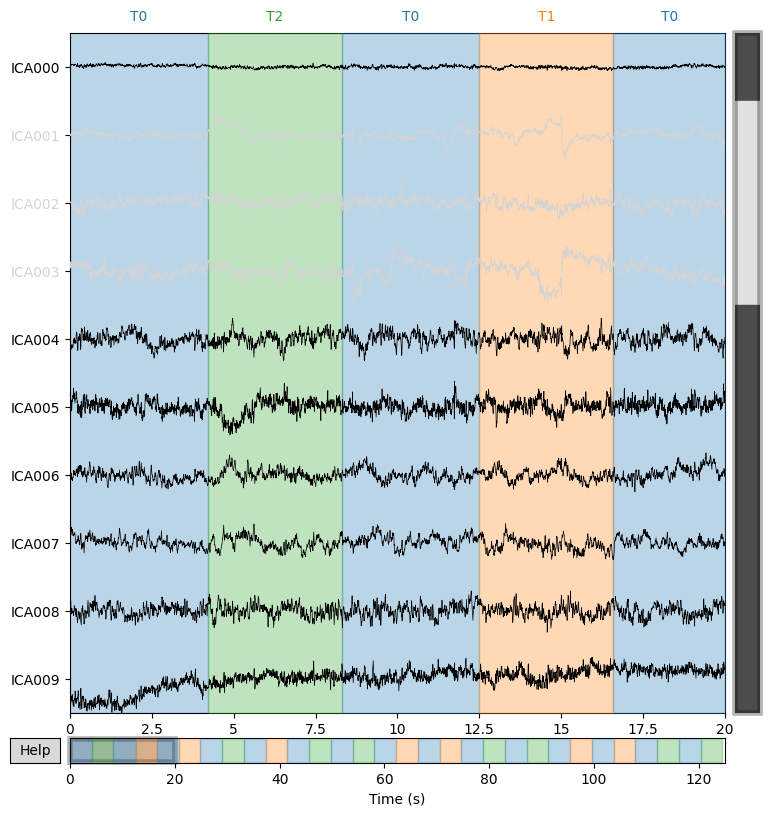

In [11]:
# Plot components
ica.plot_components()

# Identify artifact components and mark them for exclusion
# You can also manually reject components by their index
ica.exclude = [1, 2, 3]  # for example

# Plot the topomap of components
ica.plot_sources(raw[5])

In [12]:
temp = ica.apply(raw[5])

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


# CSP Implementation

In [13]:
raw_fnames=[]
raw_fnames.append(data_path[5])
raw_fnames.append(data_path[9])
raw_fnames.append(data_path[13])

In [14]:
tmin, tmax = -1.0, 4.0
event_id = dict(eye=1,hands=2, feet=3)
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

# raw_fnames = eegbci.load_data(subject, runs)
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("standard_1005")
raw.set_montage(montage)

# Apply band-pass filter
raw.filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

events, _ = events_from_annotations(raw, event_id=dict(T0=1,T1=2, T2=3))

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)
labels = epochs.events[:, -1] - 2

Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 801 original time points ...
3 bad epochs dropped


In [15]:
print(epochs.events)
print(len(labels))

[[  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     2]
 [ 6640     0     1]
 [ 7312     0     3]
 [ 7968     0     1]
 [ 8640     0     3]
 [ 9296     0     1]
 [ 9968     0     2]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     3]
 [20672     0     2]
 [21328     0     1]
 [22000     0     3]
 [22656     0     1]
 [23328     0     3]
 [23984     0     1]
 [24656     0     2]
 [25312     0     1]
 [25984     0     3]
 [26640     0     1]
 [27312     0     2]
 [27968     0     1]
 [28640     0     2]
 [29296     0     1]
 [29968     0     3]
 [30624     0     1]
 [31296     0     3]
 [31952     0     1]
 [32624     0

Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors


Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 8e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-05 (2.2e-16 eps * 64 dim * 6.4e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Us

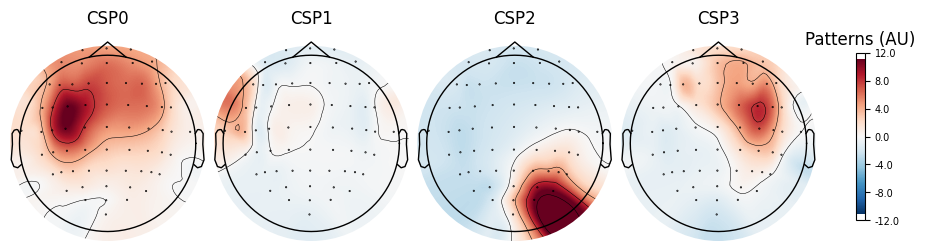

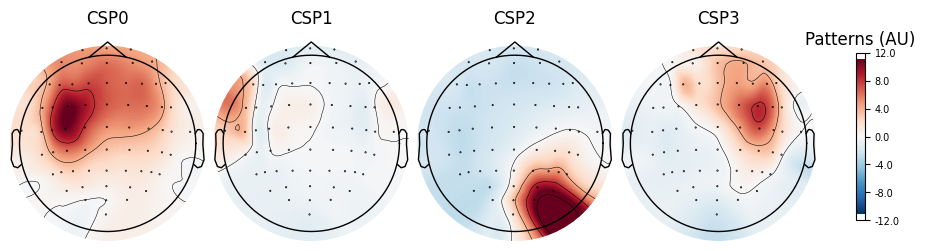

In [16]:
# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = epochs.get_data(copy=False)
epochs_data_train = epochs_train.get_data(copy=False)
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=None)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1.0 - class_balance)
print(
    "Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance)
)

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

csp.plot_patterns(epochs.info, ch_type="eeg", units="Patterns (AU)", size=1.5)

In [17]:
# csp_patterns=csp.fit_transform(epochs_data, labels)
# fig, axes = plt.subplots(nrows=len(csp_patterns), ncols=1, figsize=(10, len(csp_patterns) * 2))

# for idx, pattern in enumerate(csp_patterns):
#     axes[idx].plot(epochs.times, pattern)
#     axes[idx].set_title(f"CSP Pattern {idx + 1}")
#     axes[idx].set_xlabel('Time (s)')
#     axes[idx].set_ylabel('Amplitude')
#     axes[idx].grid(True)

# plt.tight_layout()
# plt.show()

In [18]:
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA

In [19]:
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
events, _ = events_from_annotations(raw, event_id=dict(T0=1,T1=2, T2=3))
event_id = dict(eye=1,hands=2, feet=3)
print(raw)

Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.3 MB, data loaded>


Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 113 original time points ...
3 bad epochs dropped


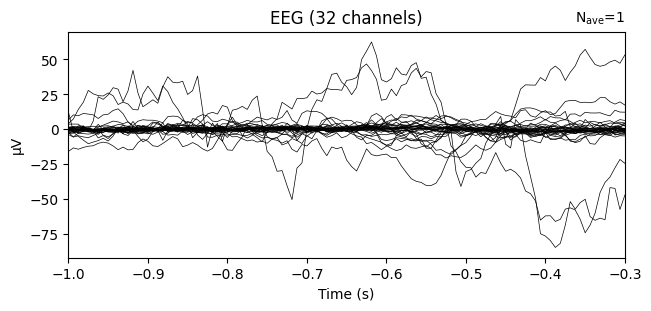

In [20]:
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)
epochs_new = Epochs(
    raw,
    events,
    event_id,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
X = epochs_new.get_data(copy=False)
pca = UnsupervisedSpatialFilter(PCA(32), average=False)
pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(
    np.mean(pca_data, axis=0),
    mne.create_info(32, epochs.info["sfreq"], ch_types="eeg"),
    tmin=tmin,
)
ev.plot(show=False, window_title="PCA", time_unit="s")

In [21]:
print(pca_data.shape)

(87, 32, 113)


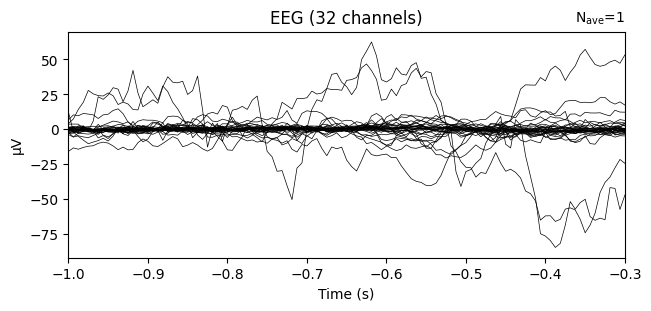

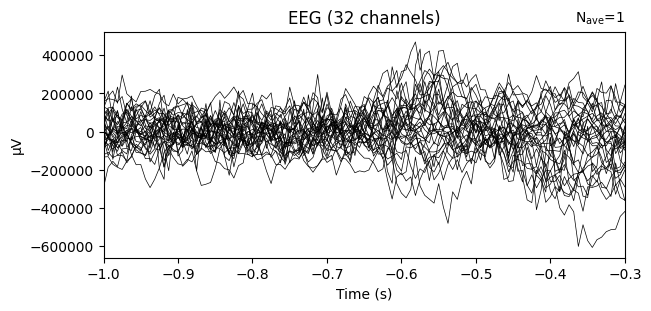

In [22]:
ica = UnsupervisedSpatialFilter(FastICA(32, whiten="unit-variance"), average=False)
ica_data = ica.fit_transform(X)
ev1 = mne.EvokedArray(
    np.mean(ica_data, axis=0),
    mne.create_info(32, epochs.info["sfreq"], ch_types="eeg"),
    tmin=tmin,
)
ev1.plot(show=False, window_title="ICA", time_unit="s")

plt.show()

In [23]:
print(ica_data.shape)

(87, 32, 113)
